# Homework Assignment 2

## Section 1: Admissions Dataset

In [1]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [4]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [5]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

<b> Answer</b>

In [8]:
admissions.prestige.unique()

array([ 3.,  1.,  4.,  2., nan])

target/outcome variable: admit

features: gre, gpa, prestige

continuous features: gre, gpa

prestige: categorical

In [6]:
admissions.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

In [7]:
admissions.admit.value_counts(normalize=True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [11]:
admissions = pd.get_dummies(admissions, columns=['prestige'])

In [12]:
admissions.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


**Question 2:**

What do you think is the goal of using machine learning with this dataset.

<b>Answer</b>

Machine learning with this dataset will help us determine which application need to be admitted and which not

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

In [30]:
admissions.gpa.unique()

array([3.61, 3.67, 4.  , 3.19, 2.93, 3.  , 2.98, 3.08, 3.39, 3.92, 3.22,
       3.44, 3.87, 2.56, 3.75, 3.81, 3.17, 3.63, 2.82, 3.35, 3.66, 3.74,
       3.29, 3.78, 3.4 , 3.14, 3.05, 3.25, 2.9 , 3.13, 2.68, 2.42, 3.32,
       3.15, 3.31, 2.94, 3.45, 3.46, 2.97, 2.48, 3.86, 3.37, 3.27, 3.34,
       3.65, 3.18, 3.85, 3.59, 3.62, 3.3 , 3.69, 3.73, 2.92, 3.36, 3.12,
       3.07, 2.71, 2.91, 3.6 , 3.48, 3.28, 3.83, 3.64, 3.9 , 3.33, 3.52,
       3.57, 2.88, 3.94, 3.95, 3.56, 3.41, 3.84, 3.99, 3.72, 3.7 , 2.67,
       2.85, 3.88, 3.38, 3.54, 2.79, 2.95, 3.58, 3.93, 3.43, 2.86, 2.52,
       3.49, 3.82, 3.5 , 2.73, 3.24, 3.77, 3.51, 2.81, 3.53, 2.62, 3.23,
       3.01,  nan, 3.76, 3.47, 3.2 , 3.89, 3.8 , 3.16, 3.02, 2.87, 3.42,
       2.76, 2.96, 3.04, 3.91, 3.21, 3.55, 3.11, 3.1 , 2.26, 2.78, 3.97,
       2.55, 3.98, 2.83, 2.84, 3.71, 2.69, 2.7 , 3.09, 2.65, 3.06, 3.03,
       2.63])

Text(0,0.5,'GRE')

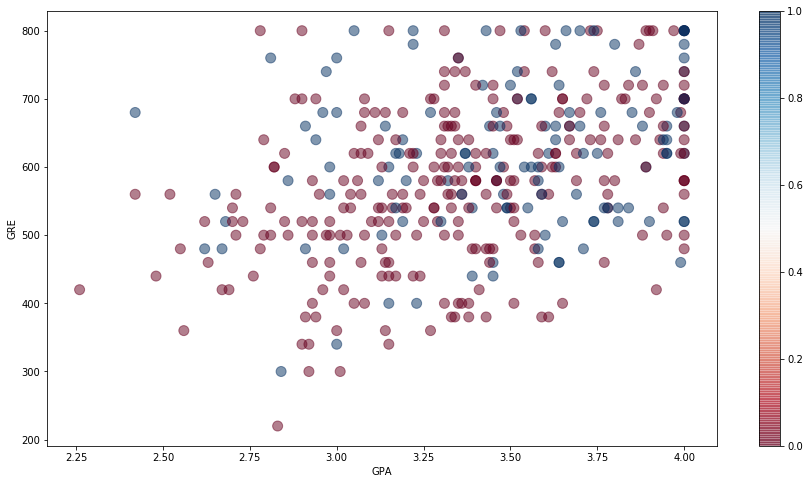

In [39]:
plt.figure( figsize=(15,8))
plt.scatter(x=admissions.gpa, y=admissions.gre, c=admissions.admit, s=100, alpha=.5, cmap='RdBu')
plt.colorbar()
plt.xlabel('GPA')
plt.ylabel('GRE')

<b>Answer</b>

From the above chart, I observe that no student with gre <450 or gpa <2.8 has been admitted. However, apart from that i dont see a lot of correlation between the gre, gpa and the admit. Sure there is a little more chance of a student being admitted, with 4.0 gpa and 800 gre score, but there are students with way less score or way less gpa that are admitted

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

    - 1. Make a train test split using a quarter of the data for testing.

In [45]:
admissions.dropna(inplace=True)

In [46]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 7 columns):
admit           397 non-null int64
gre             397 non-null float64
gpa             397 non-null float64
prestige_1.0    397 non-null uint8
prestige_2.0    397 non-null uint8
prestige_3.0    397 non-null uint8
prestige_4.0    397 non-null uint8
dtypes: float64(2), int64(1), uint8(4)
memory usage: 14.0 KB


In [85]:
X = admissions.drop('admit', axis=1)
y = admissions.admit

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

    - 2. Fit a Logistic Regression model on the training data.


In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

    - 3. Evaluate the model on both the training and testing datasets using accuracy score.


In [88]:
lr.score(X_train, y_train)

0.6868686868686869

In [89]:
lr.score(X_test, y_test)

0.72

    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

The accuracy score of training data is what the data is trained on. If this very high, then that means its overfiting. The accuracy score of test data is more than that of null accuracy, as well as the training data. That means the model is better than if we would have used no model at all

the training score is not very high, so this is not an evidence of overfiting

**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

<b>KNN</b>

(without scaling)

In [130]:
nighbors_range = list(range(1,300,2))

param_grid_knn = {}
param_grid_knn['n_neighbors'] = nighbors_range

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='roc_auc', cv=5)
grid_knn.fit(X,y)

grid_knn.best_score_, grid_knn.best_params_
# grid_knn_pipe.best_estimator_



(0.6581128862740953, {'n_neighbors': 41})

In [131]:
nighbors_range = list(range(1,300,2))

param_grid_knn_pipe = {}
param_grid_knn_pipe['kneighborsclassifier__n_neighbors'] = nighbors_range

pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

grid_knn_pipe = GridSearchCV(pipe_knn, param_grid_knn_pipe, scoring='roc_auc', cv=5)
grid_knn_pipe.fit(X,y)

grid_knn_pipe.best_score_, grid_knn_pipe.best_params_
# grid_knn_pipe.best_estimator_


(0.7007777314578323, {'kneighborsclassifier__n_neighbors': 153})

<b> Decision Tree </b>

In [136]:
max_depth_range = list(range(1,30))

param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='roc_auc', cv=5)
grid_dt.fit(X, y)

grid_dt.best_score_, grid_dt.best_params_

(0.6199408605202056, {'max_depth': 2})

<b>Answer</b>

KNN is better as it gives tehe higher roc_auc score

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

<b>Answer</b>

If I am in the admissions department, I would try to minimize false negatives, as I believe that if there are more false positives, even a not so exceptional student can be admitted to my university, and turn out and grow better at my university . However if I don't admit a student that was supposed to be admitted, I for sure lose a good student

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [153]:
# X.head(1)

In [154]:
lr.predict_proba([[560, 3.6,0,1,0,0]])[:,1]

array([0.33517274])

In [155]:
lr.predict_proba([[750, 3.8,0,0,0,1]])[:,1]

array([0.28094091])

In [156]:
lr.predict_proba([[660, 3.1,1,0,0,0]])[:,1]

array([0.47828773])

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [233]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


<b>1. Finding correlation and applying PCA </b>

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
haight          4000 non-null float64
mission         4000 non-null float64
soma            4000 non-null float64
sunset          4000 non-null float64
richmond        4000 non-null float64
glen_park       4000 non-null float64
castro          4000 non-null float64
potrero         4000 non-null float64
hayes_valley    4000 non-null float64
fillmore        4000 non-null float64
bernal          4000 non-null float64
marina          4000 non-null float64
north_beach     4000 non-null float64
excelsior       4000 non-null float64
target          4000 non-null int64
dtypes: float64(14), int64(1)
memory usage: 500.0 KB


In [176]:
data.corr()['target'].abs().sort_values(ascending=False)

target          1.000000
potrero         0.199197
north_beach     0.198166
richmond        0.196710
castro          0.187220
hayes_valley    0.176853
haight          0.171926
mission         0.136988
excelsior       0.121039
fillmore        0.028804
sunset          0.026396
marina          0.012432
bernal          0.011225
soma            0.010718
glen_park       0.005610
Name: target, dtype: float64

Not to include: glen_park, soma, bernal, marina, sunset, fillmore

In [235]:
X = data.drop('target', axis=1)
y = data.target

In [263]:
X_small = X[['potrero', 'north_beach', 'richmond', 'castro', 'hayes_valley', 'haight','mission','excelsior']]

Trying PCA

In [264]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [266]:
pca = PCA()
pca.fit_transform(Xs, y)
pca.explained_variance_

array([3.14883351e+00, 1.72730688e+00, 1.25793115e+00, 1.13188766e+00,
       1.01965291e+00, 1.00562028e+00, 9.87083135e-01, 9.78470556e-01,
       9.27051932e-01, 8.25443819e-01, 5.42187133e-01, 4.52031915e-01,
       1.26797210e-24, 1.05757719e-24])

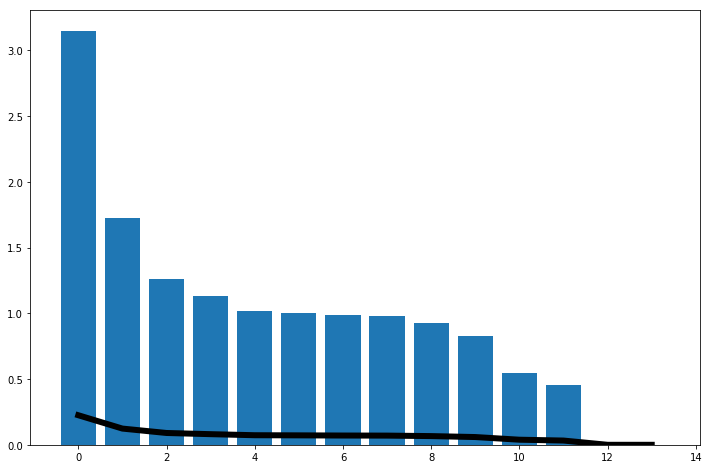

In [267]:
components = range(pca.n_components_)

plt.figure(figsize=(12,8))
plt.bar(components, pca.explained_variance_)
# plt.plot(components, pca.explained_variance_.cumsum(), c='r')
plt.plot(components, pca.explained_variance_ratio_, c='k', linewidth=6)

In [296]:
X_pca8 = PCA(n_components=8).fit_transform(X)

<b> 2. Finding null accuracy</b>

In [279]:
data.target.value_counts()

0    2553
1    1447
Name: target, dtype: int64

In [280]:
data.target.value_counts(normalize=True)

0    0.63825
1    0.36175
Name: target, dtype: float64

<b> 3a. Applying Logistic Regression </b>

In [281]:
lr = LogisticRegression()
lr.fit(X, y)
lr.score(X, y)

0.7695

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [283]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [284]:
lr.score(X_train, y_train)

0.765

In [285]:
lr.score(X_test, y_test)

0.763

In [292]:
cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5).mean()

0.7664987707012043

In [293]:
cross_val_score(LogisticRegression(), X_small, y, scoring='accuracy', cv=5).mean()

0.7687415851431018

In [298]:
cross_val_score(LogisticRegression(), X_pca, y, scoring='accuracy', cv=5).mean()

0.7662487707012042

In [299]:
cross_val_score(LogisticRegression(), X_pca8, y, scoring='accuracy', cv=5).mean()

0.7674968996045306

<b> 3b. Applying KNN </b>

Using Gridsearch to evaluate num of members

i. Using KNN

In [311]:
neighbors_range = list(range(3,50,2))

param_grid_knn = {}
param_grid_knn['n_neighbors'] = neighbors_range

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5)
grid_knn.fit(Xs,y)
grid_knn.best_score_, grid_knn.best_params_

(0.883, {'n_neighbors': 9})

ii. Using pipe

In [313]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

neighbors_range = list(range(3,50,2))

param_grid_knn_pipe = {}
param_grid_knn_pipe['kneighborsclassifier__n_neighbors'] = neighbors_range

grid_knn_pipe = GridSearchCV(pipe_knn, param_grid_knn_pipe, scoring='accuracy', cv=5)
grid_knn_pipe.fit(X,y)

grid_knn_pipe.best_score_, grid_knn_pipe.best_params_

(0.882, {'kneighborsclassifier__n_neighbors': 9})

iii. Using pipe and X_small

In [315]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

neighbors_range = list(range(3,50,2))

param_grid_knn_pipe = {}
param_grid_knn_pipe['kneighborsclassifier__n_neighbors'] = neighbors_range

grid_knn_pipe = GridSearchCV(pipe_knn, param_grid_knn_pipe, scoring='accuracy', cv=5)
grid_knn_pipe.fit(X_small,y)

grid_knn_pipe.best_score_, grid_knn_pipe.best_params_

(0.85975, {'kneighborsclassifier__n_neighbors': 15})

iv. Using pipe and X_pca 

In [316]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

neighbors_range = list(range(3,50,2))

param_grid_knn_pipe = {}
param_grid_knn_pipe['kneighborsclassifier__n_neighbors'] = neighbors_range

grid_knn_pipe = GridSearchCV(pipe_knn, param_grid_knn_pipe, scoring='accuracy', cv=5)
grid_knn_pipe.fit(X_pca,y)

grid_knn_pipe.best_score_, grid_knn_pipe.best_params_

(0.8725, {'kneighborsclassifier__n_neighbors': 17})

v. Using pipe and X_pca8

In [317]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

neighbors_range = list(range(3,50,2))

param_grid_knn_pipe = {}
param_grid_knn_pipe['kneighborsclassifier__n_neighbors'] = neighbors_range

grid_knn_pipe = GridSearchCV(pipe_knn, param_grid_knn_pipe, scoring='accuracy', cv=5)
grid_knn_pipe.fit(X_pca8,y)

grid_knn_pipe.best_score_, grid_knn_pipe.best_params_

(0.92525, {'kneighborsclassifier__n_neighbors': 9})

<b> 3c. Applying RandomForest</b>

i. Using Decision Tree

In [321]:
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [324]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [325]:
dt.score(X_test, y_test)

0.835

In [351]:
max_depth_range = list(range(1,30))
param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X,y)

grid_dt.best_score_, grid_dt.best_params_

(0.82575, {'max_depth': 8})

ii. Using Decision Tree and X_small

In [358]:
max_depth_range = list(range(1,30))
param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_small,y)

grid_dt.best_score_, grid_dt.best_params_

(0.79525, {'max_depth': 7})

iii. Using Decision Tree and X_pca

In [334]:
max_depth_range = list(range(1,30))
param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_pca,y)

grid_dt.best_score_, grid_dt.best_params_

(0.82475, {'max_depth': 8})

iv. Using Decision Tree and X_pca8

In [346]:
max_depth_range = list(range(1,30))
param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_pca8,y)

grid_dt.best_score_, grid_dt.best_params_

(0.83575, {'max_depth': 9})

v. Using RandomForestClassifier

In [393]:
# max_depth_range = list(range(11,12))
# max_feature_range = list(range(7,8))
n_estimator_range = list(range(10,500, 20))

param_grid_dt = {}
# param_grid_dt['max_depth'] = max_depth_range
# param_grid_dt['max_features'] = max_feature_range
param_grid_dt['n_estimators'] = n_estimator_range

grid_dt = GridSearchCV(RandomForestClassifier(), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X,y){}

grid_dt.best_score_, grid_dt.best_params_

(0.906, {'n_estimators': 390})

vi. Using RandomForestClassifier and X_small

In [402]:
max_depth_range = list(range(11,25))
max_feature_range = list(range(4,8))
# n_estimator_range = [180]

param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range
param_grid_dt['max_features'] = max_feature_range
# param_grid_dt['n_estimators'] = n_estimator_range

grid_dt = GridSearchCV(RandomForestClassifier(n_estimators=180, random_state=123), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_small,y)

grid_dt.best_score_, grid_dt.best_params_

(0.87025, {'max_depth': 17, 'max_features': 4})

vii. Using RandomForestClassifier and X_pca

In [403]:
max_depth_range = list(range(11,25))
max_feature_range = list(range(4,8))
# n_estimator_range = [180]

param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range
param_grid_dt['max_features'] = max_feature_range
# param_grid_dt['n_estimators'] = n_estimator_range

grid_dt = GridSearchCV(RandomForestClassifier(n_estimators=180, random_state=123), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_pca,y)

grid_dt.best_score_, grid_dt.best_params_

(0.894, {'max_depth': 23, 'max_features': 4})

viii. Using RandomForestClassifier and X_pca8

In [404]:
max_depth_range = list(range(11,25))
max_feature_range = list(range(4,8))
# n_estimator_range = [180]

param_grid_dt = {}
param_grid_dt['max_depth'] = max_depth_range
param_grid_dt['max_features'] = max_feature_range
# param_grid_dt['n_estimators'] = n_estimator_range

grid_dt = GridSearchCV(RandomForestClassifier(n_estimators=180, random_state=123), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_pca8,y)

grid_dt.best_score_, grid_dt.best_params_

(0.90075, {'max_depth': 21, 'max_features': 4})

<b> Answer </b>

Best Model: KNN - with n_neighbors = 9, and a score of .925

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [117]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head().iloc[:,0:20]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN


In [4]:
movies.drop(['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'movie_imdb_link', 'plot_keywords'], axis=1, inplace=True)

In [5]:
movies.color.fillna('Color', inplace=True)
movies.num_critic_for_reviews.fillna(movies.num_critic_for_reviews.mean(), inplace=True)
movies.duration.fillna(movies.duration.mean(), inplace=True)
movies.director_facebook_likes.fillna(movies.director_facebook_likes.mean(), inplace=True)
movies.actor_3_facebook_likes.fillna(movies.actor_3_facebook_likes.mean(), inplace=True)
movies.actor_1_facebook_likes.fillna(movies.actor_1_facebook_likes.mean(), inplace=True)
movies.actor_2_facebook_likes.fillna(movies.actor_2_facebook_likes.mean(), inplace=True)
movies.gross.fillna(movies.gross.mean(), inplace=True)
movies.facenumber_in_poster.fillna(movies.facenumber_in_poster.mean(), inplace=True)
movies.aspect_ratio.fillna(movies.aspect_ratio.mean(), inplace=True)
movies.budget.fillna(movies.budget.mean(), inplace=True)
movies.content_rating.fillna('PG-13', inplace=True)
movies.title_year.fillna(np.round(movies.title_year.mean()), inplace=True)
movies.country.fillna('USA', inplace=True)
movies.language.fillna('English', inplace=True)
movies.num_user_for_reviews.fillna(movies.num_user_for_reviews.mean(), inplace=True)

In [6]:
# genreset  = set()

# genres_column = movies.genres 

# for genre_row in genres_column:
#     for genre in genre_row.split('|'):
#         genreset.add(genre)
        
# genreset

min_genreset = set(["Adventure", "Action", "Family", "Fantasy", "Drama", "Animation", "Sci-Fi"])
for genre in min_genreset:
    movies[genre]= np.where(movies.genres.str.contains(genre), 1, 0)
    
movies.drop(['genres'], axis=1, inplace=True)

In [7]:
# movies = pd.get_dummies(movies, columns=['color','language', 'country', 'content_rating'])
movies = pd.get_dummies(movies, columns=['color'])

In [8]:
movies['English'] = movies.language.apply(lambda x: 1 if x=='English' else 0)
movies['USA'] = movies.country.apply(lambda x: 1 if x=='USA' else 0)

movies['cr_R'] = movies.content_rating.apply(lambda x: 1 if x=='R' else 0)
movies['cr_PG13'] = movies.content_rating.apply(lambda x: 1 if x=='PG-13' else 0)
movies['cr_PG'] = movies.content_rating.apply(lambda x: 1 if x=='PG' else 0)

movies.drop(['language','country', 'content_rating'], axis=1, inplace=True)

In [11]:
# "num_voted_users","num_user_for_reviews","num_critic_for_reviews","movie_facebook_likes","Adventure","actor_3_facebook_likes",

In [12]:
movies.corr()['gross'].abs().sort_values(ascending=False)

gross                        1.000000
num_voted_users              0.615385
num_user_for_reviews         0.538448
num_critic_for_reviews       0.441966
movie_facebook_likes         0.369427
Adventure                    0.334119
actor_3_facebook_likes       0.304314
actor_2_facebook_likes       0.258099
cast_total_facebook_likes    0.229040
cr_R                         0.221756
Action                       0.208179
duration                     0.204975
Family                       0.197467
Fantasy                      0.191021
Drama                        0.190274
Animation                    0.178081
imdb_score                   0.168169
Sci-Fi                       0.167489
USA                          0.162083
cr_PG13                      0.140592
actor_1_facebook_likes       0.140581
director_facebook_likes      0.139229
cr_PG                        0.137954
English                      0.128300
budget                       0.101437
color_Color                  0.035623
color_ Black

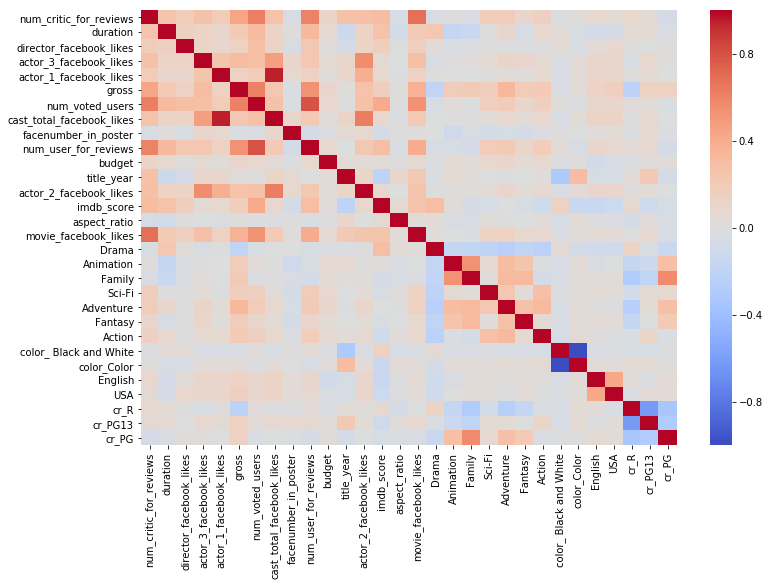

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data=movies.corr(), cmap='coolwarm')

In [14]:

cols_X =["num_voted_users","num_user_for_reviews","num_critic_for_reviews","movie_facebook_likes","Adventure","actor_3_facebook_likes","actor_2_facebook_likes","cast_total_facebook_likes","cr_R","Action","duration","Family","Fantasy","Drama","Animation","imdb_score","Sci-Fi","USA","cr_PG13","actor_1_facebook_likes","director_facebook_likes","cr_PG","English","budget","color_Color","color_ Black and White","facenumber_in_poster","title_year","aspect_ratio"]

cols_X_sub=["num_voted_users","num_user_for_reviews","num_critic_for_reviews","movie_facebook_likes","Adventure","actor_3_facebook_likes","actor_2_facebook_likes","cast_total_facebook_likes","cr_R","Action","duration","Family","Fantasy","Drama","Animation","imdb_score","Sci-Fi","USA","cr_PG13","actor_1_facebook_likes","director_facebook_likes","cr_PG","English","budget"]

cols_X_int=["num_voted_users","num_user_for_reviews","num_critic_for_reviews","movie_facebook_likes","Adventure","actor_3_facebook_likes","actor_2_facebook_likes","cast_total_facebook_likes","cr_R","Action","duration","Family","Fantasy","Drama","Animation","imdb_score","Sci-Fi","USA"]

cols_X_small=["num_voted_users","num_user_for_reviews","num_critic_for_reviews","movie_facebook_likes","Adventure","actor_3_facebook_likes","actor_2_facebook_likes","cast_total_facebook_likes","cr_R","Action","duration"]

cols_X_min=["num_voted_users","num_user_for_reviews","num_critic_for_reviews","movie_facebook_likes","Adventure"]

In [15]:
X = movies[cols_X]
X_sub=movies[cols_X_sub]
X_int=movies[cols_X_int]
X_small=movies[cols_X_small]
X_min=movies[cols_X_min]

y = movies.gross

i. Using Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.5385447464946347

In [17]:
np.mean(np.sqrt(-cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5)))

47371157.270472385

ii. Using Linear Regression and X_sub

In [18]:
np.mean(np.sqrt(-cross_val_score(LinearRegression(), X_sub, y, scoring='neg_mean_squared_error', cv=5)))

47321158.25043553

iii. Using Linear Regression and X_int

In [19]:
np.mean(np.sqrt(-cross_val_score(LinearRegression(), X_int, y, scoring='neg_mean_squared_error', cv=5)))

45660290.38290213

iv. Using Linear Regression and X_small

In [20]:
np.mean(np.sqrt(-cross_val_score(LinearRegression(), X_small, y, scoring='neg_mean_squared_error', cv=5)))

46820500.59891544

v. Using Linear Regression and X_min

In [21]:
np.mean(np.sqrt(-cross_val_score(LinearRegression(), X_min, y, scoring='neg_mean_squared_error', cv=5)))

49279419.11283903

47,371,157.27047238<br>
47,321,158.25043553<br>
45,660,290.38290213 => X_int , best <br>
46,820,500.59891544<br>
49,279,419.11283903<br>

In [23]:
# poly2 = PolynomialFeatures(degree=2)
# poly3 = PolynomialFeatures(degree=3)
# poly4 = PolynomialFeatures(degree=4)
# poly5 = PolynomialFeatures(degree=5)

# X2 = poly2.fit_transform(X)
# X3 = poly3.fit_transform(X)
# X4 = poly4.fit_transform(X)
# X5 = poly5.fit_transform(X)

vi. Using Polynomial Feature

In [24]:
poly2 = PolynomialFeatures(degree=2)

X2 = poly2.fit_transform(X)

lr = LinearRegression()
lr.fit(X2, y)
lr.score(X2, y)

0.25050715849199956

In [25]:
poly3 = PolynomialFeatures(degree=3)

X3 = poly3.fit_transform(X)

lr = LinearRegression()
lr.fit(X3, y)
lr.score(X3, y)

0.5702186712602662

In [26]:
poly4 = PolynomialFeatures(degree=4)

X4 = poly4.fit_transform(X)

lr = LinearRegression()
lr.fit(X4, y)
lr.score(X4, y)

0.37398612922929997

In [33]:
# np.mean(np.sqrt(-cross_val_score(LinearRegression(), X2, y, scoring='neg_mean_squared_error', cv=5)))

103371187.08628602

Of the Polynomial features, 3 seems to be the best degree

In [27]:
np.mean(np.sqrt(-cross_val_score(LinearRegression(), X3, y, scoring='neg_mean_squared_error', cv=5)))

11743590418.91199

vii. Using pipe 

In [30]:
pipe_poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

In [32]:
np.mean(np.sqrt(-cross_val_score(pipe_poly, X, y, scoring='neg_mean_squared_error', cv=5)))

11743590418.91199

viii. Using Pipe and X_sub

In [37]:
np.mean(np.sqrt(-cross_val_score(pipe_poly, X_sub, y, scoring='neg_mean_squared_error', cv=5)))

5614532818.026406

ix. Using Pipe and X_int

In [36]:
np.mean(np.sqrt(-cross_val_score(pipe_poly, X_int, y, scoring='neg_mean_squared_error', cv=5)))

811286223.8308027

x. Using Pipe and X_small

In [35]:
np.mean(np.sqrt(-cross_val_score(pipe_poly, X_small, y, scoring='neg_mean_squared_error', cv=5)))

971025169.5595297

xi. Using Pipe and X_min

In [34]:
np.mean(np.sqrt(-cross_val_score(pipe_poly, X_min, y, scoring='neg_mean_squared_error', cv=5)))

66184802.386315204

11,743,590,418<br>
11,743,590,418<br>
5,614,532,818<br>
811,286,223 => X_int<br>
971,025,169<br>
66,184,802 => X_min<br>

xii. Using Lasso

In [40]:
lasso = Lasso(alpha=1)
lasso.fit(X, y)
lasso.score(X, y)

/Users/roahuja/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5385389237746083

In [66]:
lasso_alphas = list(range(1, 300, 5))
# lasso_alphas = np.linspace(25, 160, 80)

param_grid_lasso = {}
param_grid_lasso['alpha']=lasso_alphas

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X, y)

np.sqrt(-grid_lasso.best_score_), grid_lasso.best_params_

(51240325.15448303, {'alpha': 1})

xiii. Using Lasso and X_sub

In [67]:
lasso_alphas = list(range(1, 300, 5))
# lasso_alphas = np.linspace(25, 160, 80)

param_grid_lasso = {}
param_grid_lasso['alpha']=lasso_alphas

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_sub, y)

np.sqrt(-grid_lasso.best_score_), grid_lasso.best_params_

(51135174.07886008, {'alpha': 296})

xiv. Using Lasso and X_int

In [68]:
lasso_alphas = list(range(1, 300, 5))
# lasso_alphas = np.linspace(25, 160, 80)

param_grid_lasso = {}
param_grid_lasso['alpha']=lasso_alphas

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_int, y)

np.sqrt(-grid_lasso.best_score_), grid_lasso.best_params_

(49993843.717768595, {'alpha': 296})

xv. Using Lasso and X_small

In [69]:
lasso_alphas = list(range(1, 300, 5))
# lasso_alphas = np.linspace(25, 160, 80)

param_grid_lasso = {}
param_grid_lasso['alpha']=lasso_alphas

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_small, y)

np.sqrt(-grid_lasso.best_score_), grid_lasso.best_params_

(51368758.618114516, {'alpha': 1})

xvi. Using Lasso and X_min

In [99]:
lasso_alphas = list(range(1, 300, 5))
# lasso_alphas = np.linspace(25, 160, 80)

param_grid_lasso = {}
param_grid_lasso['alpha']=lasso_alphas

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_min, y)

np.sqrt(-grid_lasso.best_score_), grid_lasso.best_params_

(54284108.55634212, {'alpha': 1})

51,240,325<br>
51,135,174<br>
49,993,843 => X_int<br>
51,368,758<br>
54,284,108<br>

xvi. Using Ridge and X_min

In [71]:
ridge = Ridge(alpha=100)
ridge.fit(X, y)
ridge.score(X, y)

0.537710998212626

In [95]:
ridge_alphas = np.logspace(1, 8, 400)

param_grid_ridge = {}
param_grid_ridge['alpha']=ridge_alphas

grid_ridge = GridSearchCV(Lasso(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X, y)

np.sqrt(-grid_ridge.best_score_), grid_ridge.best_params_

(51261743.13576862, {'alpha': 10000.0})

In [103]:
ridge_alphas = np.logspace(1, 8, 400)

param_grid_ridge = {}
param_grid_ridge['alpha']=ridge_alphas

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_sub, y)

np.sqrt(-grid_ridge.best_score_), grid_ridge.best_params_

(51124476.00339172, {'alpha': 10.0})

In [102]:
ridge_alphas = np.logspace(1, 8, 400)


param_grid_ridge = {}
param_grid_ridge['alpha']=ridge_alphas

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_int, y)

np.sqrt(-grid_ridge.best_score_), grid_ridge.best_params_

(50002264.576151066, {'alpha': 10.0})

In [101]:
ridge_alphas = np.logspace(1, 8, 400)

param_grid_ridge = {}
param_grid_ridge['alpha']=ridge_alphas

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_small, y)

np.sqrt(-grid_ridge.best_score_), grid_ridge.best_params_

(51385233.8167762, {'alpha': 10.0})

In [96]:
ridge_alphas = np.logspace(1, 8, 400)

param_grid_ridge = {}
param_grid_ridge['alpha']=ridge_alphas

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_min, y)

np.sqrt(-grid_ridge.best_score_), grid_ridge.best_params_

(54300388.808703706, {'alpha': 10.0})

51,261,743<br>
51,124,476<br>
50,002,264 => X_int<br>
51,385,233<br>
54,300,388<br>

<b>Answer</b>

Since Linear Regression gives teh best , I will use the Lin Reg w/ X_int dataset

In [107]:
movies.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Adventure,Fantasy,Action,color_ Black and White,color_Color,English,USA,cr_R,cr_PG13,cr_PG
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,1,1,1,0,1,1,1,0,1,0


In [106]:
X_int.head(1)

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,Adventure,actor_3_facebook_likes,actor_2_facebook_likes,cast_total_facebook_likes,cr_R,Action,duration,Family,Fantasy,Drama,Animation,imdb_score,Sci-Fi,USA
0,886204,3054.0,723.0,33000,1,855.0,936.0,4834,0,1,178.0,0,1,0,0,7.9,1,1


In [104]:
print(X_int.columns)

Index(['num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews',
       'movie_facebook_likes', 'Adventure', 'actor_3_facebook_likes',
       'actor_2_facebook_likes', 'cast_total_facebook_likes', 'cr_R', 'Action',
       'duration', 'Family', 'Fantasy', 'Drama', 'Animation', 'imdb_score',
       'Sci-Fi', 'USA'],
      dtype='object')


Movies:

1. Jumanji - Welcome to the Jungle: [145890, 482, 269, 437627, 1, 23993564, 16176, 9699, 0, 1, 119, 0, 1, 0, 0, 7.1, 0, 1]
2. Insiduous - The Kast Key: [23222, 131, 156, 5233444, 0, 313, 15583, 9699, 0, 0, 103, 0, 0, 0, 0, 5.7, 0, 1]

In [121]:
lr = LinearRegression()
lr.fit(X_int, y)
# lr.score(X_int,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
lr.predict([[145890, 482, 269, 437627, 1, 23993564, 16176, 9699, 0, 1, 119, 0, 1, 0, 0, 7.1, 0, 1]])

array([7.66263456e+10])

In [123]:
lr.predict([[23222, 131, 156, 5233444, 0, 313, 15583, 9699, 0, 0, 103, 0, 0, 0, 0, 5.7, 0, 1]])

array([2.79245851e+08])

## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.